<a href="https://colab.research.google.com/github/tongtz/photo2avatar/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [2]:
!git clone https://github.com/tongtz/photo2avatar.git

Cloning into 'photo2avatar'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 385 (delta 156), reused 151 (delta 151), pack-reused 223
Receiving objects: 100% (385/385), 28.74 MiB | 36.07 MiB/s, done.
Resolving deltas: 100% (199/199), done.


In [3]:
cd photo2avatar/

/content/photo2avatar


In [4]:
!pip3 install -r requirements.txt

     |████████████████████████████████| 15.3 MB 7.9 MB/s 
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 47.8 MB 1.5 MB/s 
     |████████████████████████████████| 4.5 MB 44.4 MB/s 
     |████████████████████████████████| 10.1 MB 45.3 MB/s 
     |████████████████████████████████| 3.8 MB 39.2 MB/s 
     |████████████████████████████████| 503 kB 60.2 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
     |████████████████████████████████| 164 kB 72.6 MB/s 
     |████████████████████████████████| 181 kB 71.9 MB/s 
     |████████████████████████████████| 76 kB 5.3 MB/s 
     |████████████████████████████████| 111 kB 53.1 MB/s 
     |████████████████████████████████| 4.3 MB 49.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 131 kB 67.4 MB/s 
     |███████████████

In [6]:
#!pip uninstall tensorflow==2.8.0
!pip install tensorflow==1.15.0

In [7]:
!wget -O ./checkpoint/temp https://www.dropbox.com/sh/63xqqqef0jtevmg/AADN7izdFHxueUbTSRBZrpffa?dl=0

--2022-04-23 00:21:29--  https://www.dropbox.com/sh/63xqqqef0jtevmg/AADN7izdFHxueUbTSRBZrpffa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/63xqqqef0jtevmg/AADN7izdFHxueUbTSRBZrpffa [following]
--2022-04-23 00:21:29--  https://www.dropbox.com/sh/raw/63xqqqef0jtevmg/AADN7izdFHxueUbTSRBZrpffa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15032910d210fdf94354b64182.dl.dropboxusercontent.com/zip_download_get/BHRLcdd43Qm4e2NXJPO9Eu03PeHvMIjcVQg9_d4jRzo9fLWwwAvn_yo1cjlDDBbialt3t9-gJfS4dOC9xzGErMbmFMeK69sjDFg8JHlsSqgxGQ# [following]
--2022-04-23 00:21:30--  https://uc15032910d210fdf94354b64182.dl.dropboxusercontent.com/zip_download_get/BHRLcdd43Qm4e2NXJPO9Eu03PeHvMIjcVQg9_d4jRzo9fLWwwAvn_yo1cjlDDBbialt3t9-gJfS4dOC9

In [9]:
import zipfile, os
path = './checkpoint/temp'
with zipfile.ZipFile(path, 'r') as zip_ref:
  zip_ref.extractall('./checkpoint')
os.rename('./checkpoint/UGATIT_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing','./checkpoint/UGATIT_sample_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing')

In [8]:
#!unzip /content/photo2avatar/AABjCb-1StRWmd1ugqfbfj5Ua?dl=0 -d /content/photo2avatar/checkpoint

# Preprocess

In [31]:
import PIL
from PIL import Image
from IPython.display import Image 
img = PIL.Image.open("./dataset/sample/testA/images1.jpeg").convert("RGB")

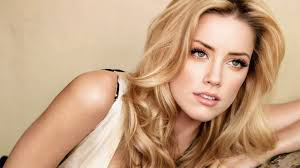

In [32]:
img


In [15]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.0
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blinker                       1.4
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4     

In [16]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 2.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [33]:
import numpy as np
import cv2
from preprocessing.preprocess import Preprocess
import PIL
from io import BytesIO

img = np.array(img) 

pre = Preprocess()
# face alignment and segmentation
face_rgba = pre.process(img)
face = face_rgba[:,:,:3].copy()
mask = face_rgba[:,:,3].copy()[:,:,np.newaxis]/255.
face_white_bg = (face*mask + (1-mask)*255).astype(np.uint8)
cv2.imwrite('./dataset/sample/testA/0000.png', cv2.cvtColor(face_white_bg, cv2.COLOR_RGB2BGR))

/usr/local/lib/python3.7/dist-packages/face_alignment/detection/dlib/dlib_detector.py:13: UserWarning: Warning: this detector is deprecated. Please use a different one, i.e.: S3FD.
  warnings.warn('Warning: this detector is deprecated. Please use a different one, i.e.: S3FD.')


True

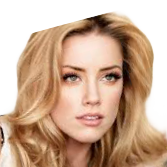

In [34]:
Image(filename="./dataset/sample/testA/0000.png")

In [38]:
#!python data_process.py --data_path ./dataset/sample/testA/ --save_path ./IMG/

# Test

In [35]:
import subprocess
import sys
subprocess.run([f"{sys.executable}", "main.py"])

CompletedProcess(args=['/usr/bin/python3', 'main.py'], returncode=0)

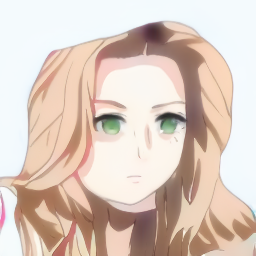

In [37]:
#img = Image(filename="./img/WechatIMG28.jpeg")
output = Image(filename="./results/UGATIT_sample_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/0000.png")
display(output)